# Shot and Pass Maps

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
from pandas import json_normalize
from adjustText import adjust_text
from FCPython import createPitch
from genfunc import *

### FoT Shot Map

In [106]:
#Size of pitch in yards
pitchLength=120
pitchWidth=80

In [112]:
#ID for England VS Sweden WWC
matchID = 15986
comp_id = 43
season_id = 3
home_team = "Barcelona"
away_team = "Girona"

In [62]:
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"
comp_url = base_url + "matches/{}/{}.json"
event_url = base_url + "events/{}.json"

In [63]:
'''
def load_data(comp_id, season_id):
    matches = requests.get(url=comp_url.format(comp_id,season_id)).json()
    
    match_ids = [match["match_id"] for match in matches]
    
    all_events = []
    for match_id in match_ids:
        events = requests.get(url=event_url.format(match_id)).json()
        all_events.append(events)
    
    return all_events
'''

'\ndef load_data(comp_id, season_id):\n    matches = requests.get(url=comp_url.format(comp_id,season_id)).json()\n    \n    match_ids = [match["match_id"] for match in matches]\n    \n    all_events = []\n    for match_id in match_ids:\n        events = requests.get(url=event_url.format(match_id)).json()\n        all_events.append(events)\n    \n    return all_events\n'

In [141]:
#Function which creates the shot map
def basic_shot_map(matchID):
    #Load event data of the reqiured match
    match = requests.get(url=event_url.format(matchID)).json()
    #Turn json format into pandas dataframe
    df = json_normalize(match, sep="_").assign(match_id = requests.get(url=event_url.format(matchID)))
    #Extract the shots from all the events
    shots = df.loc[df["type_name"] == "Shot"]
    #Create Pitch
    (fig, ax) = createPitch(pitchLength, picthWidth, "yards", "gray")
    #plot the shots
    for i,shot in shots.iterrows():
        x=shot['location'][0]
        y=shot['location'][1]

        goal=shot['shot_outcome_name']=='Goal'
        team_name=shot['team_name']

        circleSize=np.sqrt(shot['shot_statsbomb_xg']*50)

        if (team_name==home_team):
            if goal:
                shotCircle=plt.Circle((x,pitchWidth-y),circleSize,color="red")
                plt.text((x+1),pitchWidth-y+1,shot['player_name']) 
            else:
                shotCircle=plt.Circle((x,pitchWidth-y),circleSize,color="red")     
                shotCircle.set_alpha(.2)
        elif (team_name==away_team):
            if goal:
                shotCircle=plt.Circle((pitchLength-x,y),circleSize,color="blue") 
                plt.text((pitchLength-x+1),y+1,shot['player_name'])
            else:
                shotCircle=plt.Circle((pitchLength-x,y),circleSize,color="blue")      
                shotCircle.set_alpha(.2)
        ax.add_patch(shotCircle)


    plt.text(5,75,away_team + ' shots') 
    plt.text(80,75,home_team + ' shots') 


    fig.set_size_inches(10, 7)
    plt.show()
    return ax

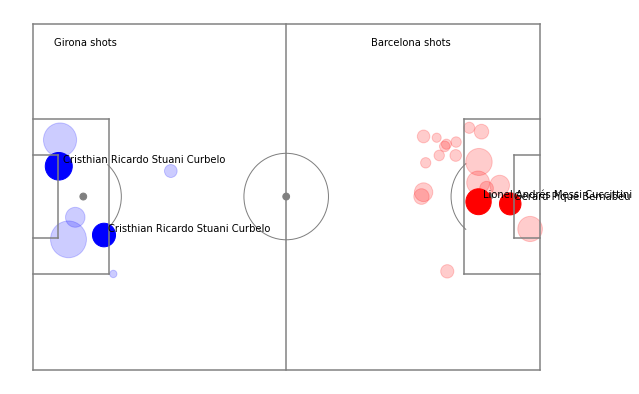

In [142]:
basic_shot_map(15986)